In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

In [2]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 579.2/579.2 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 2.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 988.4/988.4 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 1.6 MB/s eta 0:00:00a 0:00:01


In [5]:
import numpy as np 
import math

# data processing
import pandas as pd

# data visualization(for EDA)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
#import plotly.express as px
#import cufflinks as cf
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')



#For lstm model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#for Arima model
#from pmdarima.arima import auto_arima
#from statsmodels.tsa.stattools import adfuller

In [8]:
df=pd.read_csv("Rainfall_1901_2016_PAK.csv")
df

,Rainfall - (MM),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
...,...,...,...
1387,60.60610,2016,August
1388,13.76940,2016,September
1389,1.07552,2016,October
1390,2.88480,2016,November


In [ ]:
df['Date']=pd.to_datetime(df[' Year'].astype(str)  + df['Month'], format='%Y%B').dt.to_period('m')
df = df.set_index('Date')
df = df.rename(columns = {'Rainfall - (MM)':'Rainfall',' Year':'Year'})
df.head()

,Rainfall,Year,Month
Date,,,
1901-01,40.4258,1901,January
1901-02,12.3022,1901,February
1901-03,25.5119,1901,March
1901-04,14.2942,1901,April
1901-05,38.3046,1901,May


In [ ]:
dataset = df.drop(columns = ['Month','Year'])
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[0.26190438],
       [0.0792233 ],
       [0.1650289 ],
       ...,
       [0.0062987 ],
       [0.01805115],
       [0.05012785]])

In [ ]:
def create_dataset(dataset, look_back=10):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
training_size=int(len(dataset)*0.90)
test_size=len(dataset)-training_size
train, test =dataset[0:training_size,:],dataset[training_size:len(dataset),:1]

#reshape into X=t and Y=t+1
look_back =10
trainX, train_y = create_dataset(train, look_back)
testX, test_y = create_dataset(test, look_back)

In [ ]:
test.shape

(140, 1)

In [ ]:
training_size=int(len(df)*0.90)
test_size=len(df)-training_size
train,valid=df.iloc[0:training_size,:],df.iloc[training_size:len(df),:1]
training = train['Rainfall']
validation = valid['Rainfall']

In [ ]:
testPredict = model.predict(testX)
# invert predictions
test_Predict = scaler.inverse_transform(testPredict)
test_Y = scaler.inverse_transform([testY])
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(test_Y[0], test_Predict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


NameError: name 'model' is not defined

In [ ]:
#trainX = np.reshape(trainX, (1241,)).shape# p=2, d=1, q=2
#trainX = trainX.values.ravel()
#trainX = trainX[:, 0]
train_y_1d = np.ravel(train_y)

**ARIMA**

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#train, test = df.iloc[:1242], df.iloc[1242:]

#model = ARIMA(training, order=(2, 1, 2)) # p=2, d=1, q=2

#model = ARIMA(trainX, order=(2, 1, 2)) # p=2, d=1, q=2
model = sm.tsa.ARIMA(train_y, order=(2, 1, 2))
results = model.fit()
# Fit the model
#model_fit = model.fit()

In [ ]:
predictions = results.forecast(len(test))

In [ ]:
forecast_index = pd.date_range(start=pd.Timestamp.now(), periods=len(testX)+len(predictions), freq='D')


In [ ]:
steps = len(testX)  # Set steps to the length of test_x
forecast = results.forecast(steps=steps+11)

# Step 3: Generate in-sample predictions


In [ ]:
forecast.shape

In [ ]:
predictions = results.predict(start=0, end=steps+10)

In [ ]:
forecast_series = pd.Series(predictions, index=forecast_index[-len(predictions):])  # Assuming train_x is a pandas DataFrame with datetime index
forecast_df = pd.DataFrame({'forecast': predictions}, index=forecast_index[-len(predictions):])

In [ ]:
future_forecast.shape

In [ ]:
predictions1 = np.reshape(predictions, (-1, 1))

In [ ]:
concatenated = np.concatenate([train_y_reshaped ,test], axis=0)
start_idx = len(train_y_reshaped) - 1  # Start at the end of train_y
end_idx = start_idx + len(test)+ len(predictions1)

In [ ]:
concatenated_pred = np.concatenate([concatenated, predictions1], axis=0)


In [ ]:
concatenated_test = np.concatenate([concatenated, test], axis=0)


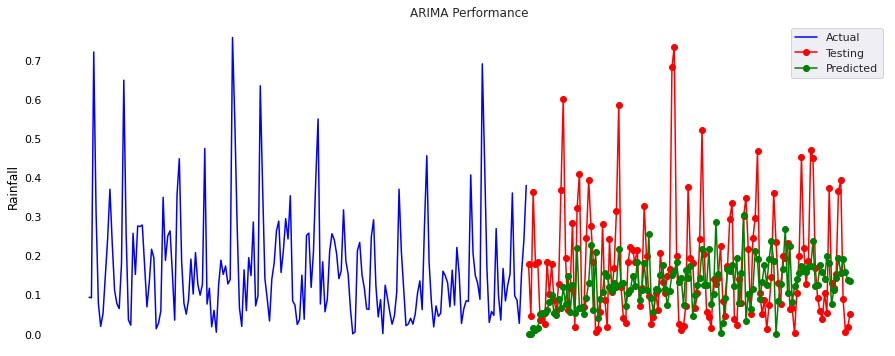

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

ax.plot(range(1240, 1380), test, color='red', marker='o', label='Testing')

ax.plot(range(1240, 1380), predictions, color='green', marker='o', label='Predicted')

#ax.plot(concatenated_pred[0:1240], color='green', label='Actual')
#ax.plot(concatenated_pred[1240:1380], color='blue', label='Testing')
#ax.plot(predictions, color='red', label='Predicted')

# Set the plot title and axis labels
ax.set_title('ARIMA Performance')
ax.set_xlabel('Samples')
ax.set_ylabel('Rainfall')

# Remove the grid lines
ax.grid(False)
ax.xaxis.set_visible(False)
# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()

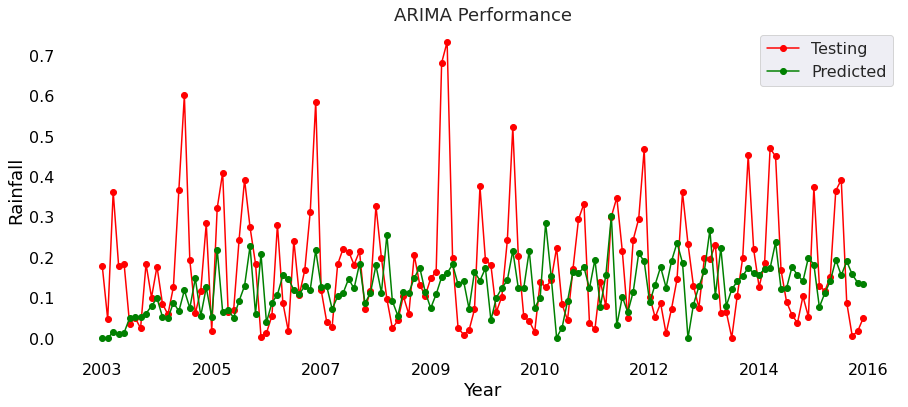

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
#ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

ax.plot( test, color='red', marker='o', label='Testing')

ax.plot( predictions, color='green', marker='o', label='Predicted')

#ax.plot(concatenated_pred[0:1240], color='green', label='Actual')
#ax.plot(concatenated_pred[1240:1380], color='blue', label='Testing')
#ax.plot(predictions, color='red', label='Predicted')

# Set the plot title and axis labels
ax.set_title('ARIMA Performance', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Rainfall', fontsize=18)

# Remove the grid lines
ax.grid(False)
#ax.xaxis.set_visible(False)

x_values = [0,20, 40, 60, 80, 100, 120, 140]

# Create a corresponding list of x-axis tick labels
x_tick_labels = ['2003', '2005', '2007', '2009', '2010', '2012','2014', '2016']
# Set the legend
plt.xticks(x_values, x_tick_labels)
ax.legend(loc='upper right', fontsize=16)
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black',labelsize=16)
ax.tick_params(axis='y', colors='black',labelsize=16)
#fig.set_facecolor('white')
# Show the plot
plt.show()

In [ ]:
predictions = results.predict(start=0, end=len(train_y)-1)
residuals = train_y - predictions

In [ ]:
#start_date = train_y.index[0]
#train_y_index = pd.date_range(start=start_date, periods=len(train_y), freq='D')
#train_y_series = pd.Series(train_y, index=train_y.index)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(residuals, color='orange', label='Residuals')
#ax.plot(predictions, color='blue', label='Predicted')

# Set the plot title and axis labels
ax.set_title('ARIMA Model Residuals')
ax.set_xlabel('Index')
ax.set_ylabel('Residuals')

# Remove the grid lines
ax.grid(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()


In [ ]:
residual_mean = np.mean(residuals)

print("Residual Mean:", residual_mean)

In [ ]:
test = test[:140, 0]

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#y_pred = best_model.predict(X_test_1)
y_pred=predictions
y_test=test
mse= mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", round(rmse,4))
mae= mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae,4))
r2= r2_score(y_test, y_pred)
print("R2:",round(r2,4) )
ape = np.abs((y_test - y_pred) / y_test)
mape = np.mean(ape) * 100
print("MAPE:", round(mape,4))
squared_diff = (y_pred - y_test) ** 2
mse = np.mean(squared_diff)
print("MSE:", round(mse,4))
rmse = np.sqrt(mse)
y_max = np.max(np.concatenate([y_pred, y_test]))
y_min = np.min(np.concatenate([y_pred, y_test]))
# Calculate range of target variable
y_range = y_max - y_min
rrmse = rmse / y_range
print("rRMSE", round(rrmse,4))

In [ ]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [ ]:
training_size=int(df1*0.90)
test_size=df1-training_size
train,valid=df1[0:training_size,:],df1[training_size:df1,:1]
training = train['Rainfall']
validation = valid['Rainfall']

NameError: name 'df1' is not defined

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model1 = auto_arima(train_y, start_p=0, start_q=0,max_p=3, max_q=3, m=12,start_P=0,start_Q=0,max_P=1,max_Q=1, seasonal=True,d=0, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model1.fit(train_y)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-1147.616, Time=0.29 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-1505.557, Time=3.11 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.95 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1149.571, Time=0.12 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-1159.180, Time=0.23 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=11.66 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=6.68 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=-1499.567, Time=1.74 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=-1503.779, Time=3.53 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-1504.091, Time=3.57 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=-1505.748, Time=2.95 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=-1160.141, Time=0.37 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=14.66 sec
 ARIMA(0,0,2)(1,1,0)[12] intercept   : AIC=-1503.878, Time=3.35 sec
 ARIMA(1,0,2)(1,1,0)[12] i

ARIMA(order=(0, 0, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast

In [ ]:
future_forecast = model1.predict(len(test))

In [ ]:
future_forecast.shape

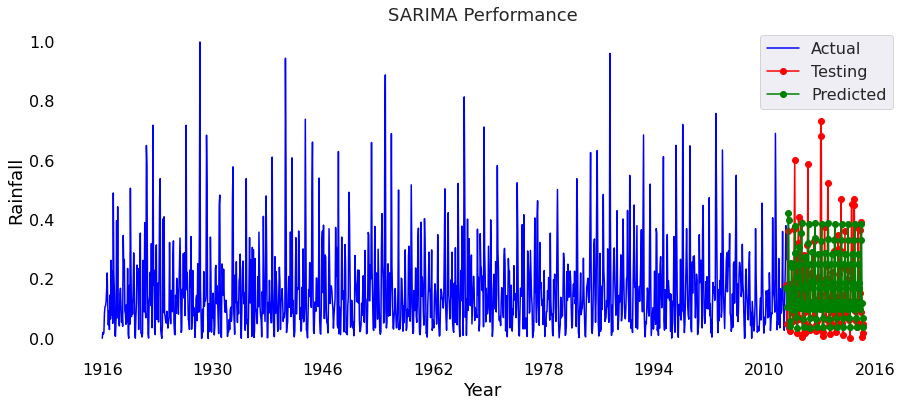

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
#ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

ax.plot( train_y , color='blue', label='Actual')

ax.plot(range(1240, 1380), test, color='red', marker='o', label='Testing')

ax.plot(range(1240, 1380), future_forecast, color='green', marker='o', label='Predicted')
#ax.plot(test, color='blue', label='Actual')
#ax.plot(future_forecast, color='red', label='Predicted')

# Set the plot title and axis labels
ax.set_title('SARIMA Performance', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Rainfall', fontsize=18)

# Remove the grid lines
ax.grid(False)
#ax.xaxis.set_visible(False)

x_values = [0,200, 400, 600, 800, 1000, 1200, 1400]

# Create a corresponding list of x-axis tick labels
x_tick_labels = ['1916', '1930', '1946', '1962', '1978', '1994','2010', '2016']
# Set the legend
plt.xticks(x_values, x_tick_labels)
ax.legend(loc='upper right', fontsize=16)
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black',labelsize=16)
ax.tick_params(axis='y', colors='black',labelsize=16)
#fig.set_facecolor('white')
# Show the plot
plt.show()


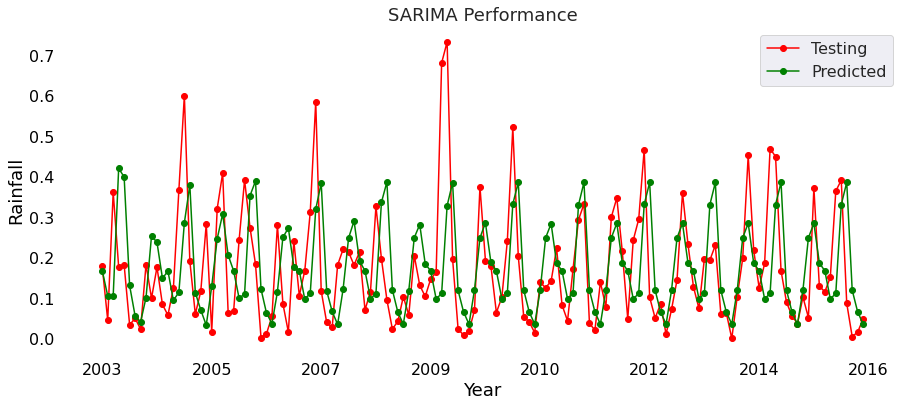

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
#ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

#ax.plot( train_y , color='blue', label='Actual')

ax.plot(test, color='red', marker='o', label='Testing')

ax.plot(future_forecast, color='green', marker='o', label='Predicted')
#ax.plot(test, color='blue', label='Actual')
#ax.plot(future_forecast, color='red', label='Predicted')

# Set the plot title and axis labels
ax.set_title('SARIMA Performance', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Rainfall', fontsize=18)

# Remove the grid lines
ax.grid(False)
#ax.xaxis.set_visible(False)

x_values = [0,20, 40, 60, 80, 100, 120, 140]

# Create a corresponding list of x-axis tick labels
x_tick_labels = ['2003', '2005', '2007', '2009', '2010', '2012','2014', '2016']
# Set the legend
plt.xticks(x_values, x_tick_labels)
ax.legend(loc='upper right', fontsize=16)
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black',labelsize=16)
ax.tick_params(axis='y', colors='black',labelsize=16)
#fig.set_facecolor('white')
#fig.set_facecolor('white')
# Show the plot
plt.show()


In [ ]:
predictions = model1.predict(len(train_y))
residuals = train_y - predictions

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(residuals, color='orange', label='Residuals')
#ax.plot(future_forecast, color='blue', label='Predicted')

# Set the plot title and axis labels
ax.set_title('SARIMA Model Residuals')
ax.set_xlabel('Index')
ax.set_ylabel('Residuals')


# Remove the grid lines
ax.grid(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()


In [ ]:
residual_mean = np.mean(residuals)

print("Residual Mean:", residual_mean)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model1.predict(len(testX)+11)
#y_pred=predictions
y_test=test
mse= mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", round(rmse,4))
mae= mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae,4))
r2= r2_score(y_test, y_pred)
print("R2:",round(r2,4) )
ape = np.abs((y_test - y_pred) / y_test)
mape = np.mean(ape) * 100
print("MAPE:", round(mape,4))
squared_diff = (y_pred - y_test) ** 2
mse = np.mean(squared_diff)
print("MSE:", round(mse,4))
rmse = np.sqrt(mse)
y_max = np.max(np.concatenate([y_pred, y_test]))
y_min = np.min(np.concatenate([y_pred, y_test]))
# Calculate range of target variable
y_range = y_max - y_min
rrmse = rmse / y_range
print("rRMSE", round(rrmse,4))

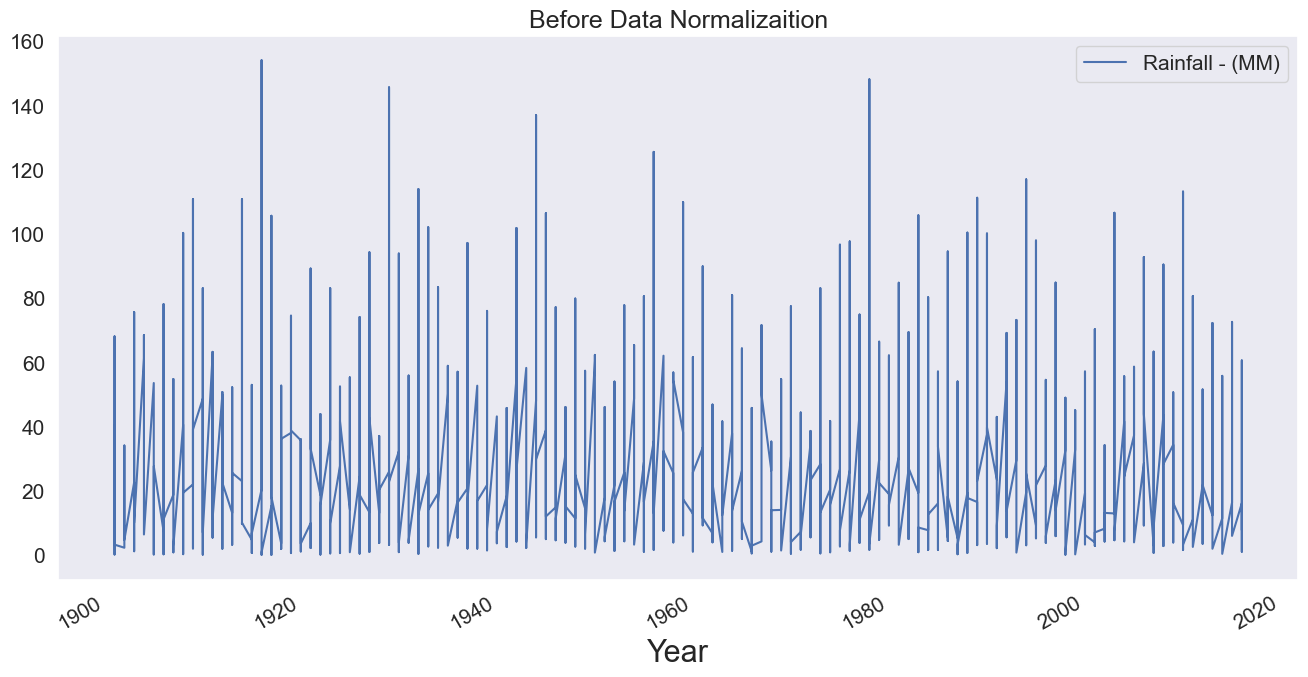

In [10]:
#choosing DOM_hourly.csv data for analysis
fpath='Rainfall_1901_2016_PAK.csv'

#Let's use datetime(2012-10-01 12:00:00,...) as index instead of numbers(0,1,...)
#This will be helpful for further data analysis as we are dealing with time series data
df = pd.read_csv(fpath, index_col=' Year', parse_dates=[' Year'])
df.head()

#checking missing data
df.isna().sum()

#Data visualizat

#Visualize data after normalization

df.plot(figsize=(16,8),legend=True)
fig = plt.gcf()

# Set face color to white
fig.set_facecolor('white')
plt.title('Before Data Normalizaition', fontsize=18)
plt.grid(False)

plt.xlabel('Year', fontsize=22)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [12]:
df=pd.read_csv('Rainfall_1901_2016_PAK.csv')
df.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


In [13]:
df['Date']=pd.to_datetime(df[' Year'].astype(str)  + df['Month'], format='%Y%B').dt.to_period('m')
df = df.set_index('Date')
df = df.rename(columns = {'Rainfall - (MM)':'Rainfall',' Year':'Year'})
df.head()

,Rainfall,Year,Month
Date,,,
1901-01,40.4258,1901,January
1901-02,12.3022,1901,February
1901-03,25.5119,1901,March
1901-04,14.2942,1901,April
1901-05,38.3046,1901,May


In [14]:
df1 = df.drop(columns = ['Month','Year'])

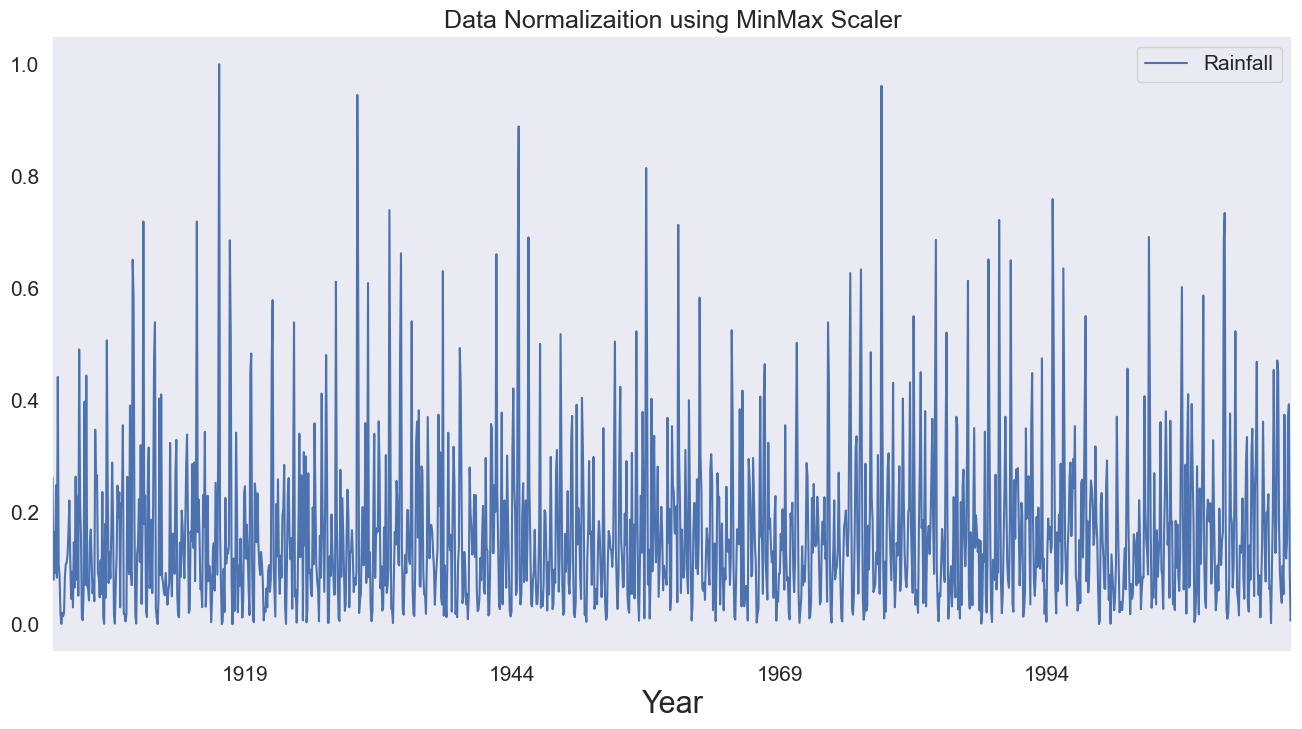

In [16]:
def normalize_data(df1): 
    #scaler = sklearn.preprocessing.StandardScaler()
    scaler = MinMaxScaler()
    df1['Rainfall']=scaler.fit_transform(df1['Rainfall'].values.reshape(-1,1)) 
    return df1

df_norm = normalize_data(df1) 
df_norm.shape

#Visualize data after normalization

df_norm.plot(figsize=(16,8),legend=True)
fig = plt.gcf()

# Set face color to white
fig.set_facecolor('white')
plt.title('Data Normalizaition using MinMax Scaler', fontsize=18)
plt.grid(False)
plt.xlabel('Year', fontsize=22)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [17]:
df1=df_norm.count
df1

<bound method DataFrame.count of          Rainfall
Date             
1901-01  0.261904
1901-02  0.079223
1901-03  0.165029
1901-04  0.092163
1901-05  0.248126
...           ...
2016-08  0.392989
2016-09  0.088754
2016-10  0.006299
2016-11  0.018051
2016-12  0.050128

[1392 rows x 1 columns]>

In [18]:
df1=df_norm.shape[0]-150
df1

1242

In [19]:
# train data for deep learning models

def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i - seq_len: i, 0])
        y_train.append(stock.iloc[i, 0])

    # 1 last 6189 days are going to be used in test
    X_test = X_train[df1:]
    y_test = y_train[df1:]

    # 2 first 110000 days are going to be used in training
    X_train = X_train[:df1]
    y_train = y_train[:df1]

    # 3 convert to numpy array
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # 4 reshape data to input into RNN models
    #X_train = np.reshape(X_train, (df1, seq_len, 1))

    #X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

    return [X_train, y_train, X_test, y_test]

In [20]:
#create train, test data
seq_len = 10 #choose sequence length

X_train, y_train, X_test, y_test = load_data(df_norm, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1242, 10)
y_train.shape =  (1242,)
X_test.shape =  (140, 10)
y_test.shape =  (140,)


In [21]:
X_train = np.reshape(X_train, (df1, seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))


In [ ]:
X_train.shape

In [22]:
y_train_1 = np.reshape(y_train, (1242, -1))
X_train_1 = np.reshape(X_train, (1242, -1))
X_test_1 = np.reshape(X_test, (140, -1))

In [ ]:
X_test.shape

**XGB Regressor Done**

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
params = {
    'objective': 'reg:squarederror',
    'colsample_bytree': 0.3,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 1000
}
#model = xgb.train(params,y_train_1, num_boost_round=100)
#xgb_model= model.fit(X_train_1, y_train_1)

xgb_model=model.fit(X_train_1, y_train_1,
          eval_set=[(X_train_1, y_train_1), (X_test_1, y_test)], # Specify train and validation sets
          eval_metric=['rmse'], # Specify evaluation metric(s)
          verbose=10 # Print progress every 10 rounds
          )

# Retrieve training and validation loss
train_losses = model.evals_result()['validation_0']['rmse']
val_losses = model.evals_result()['validation_1']['rmse']


**Updated XGBOOST**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_grid = {
   # 'n_estimators': [100, 200, 300], # Number of boosting rounds
    #'learning_rate': [0.1, 0.05, 0.01], # Learning rate
    #'max_depth': [3, 4, 5], # Maximum depth of trees
    #'subsample': [0.8, 0.9, 1.0], # Subsample ratio for each boosting round
    #'gamma': [0, 0.1, 0.2], # Minimum loss reduction required to make a further partition on a leaf node of the tree
    #'reg_alpha': [0, 0.1, 0.2], # L1 regularization term on weights
    #'reg_lambda': [0, 0.1, 0.2], # L2 regularization term on weights
    'learning_rate': [0.05, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        #'objective': ['binary:logistic']
}

# Define the XGBoost model
model = xgb.XGBRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_1, y_train_1,eval_set=[(X_train_1, y_train_1), (X_test_1, y_test)], # Specify train and validation sets
          eval_metric=['rmse'], verbose=10 ) # Print progress every 10 rounds)

# Retrieve the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the best model on the entire dataset
best_model.fit(X_train_1, y_train_1)

# Make predictions with the best model
y_pred = best_model.predict(X_test_1)

# Compute evaluation metrics for the best model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Best Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


In [ ]:
train_losses = best_model.evals_result()['validation_0']['rmse']
val_losses = best_model.evals_result()['validation_1']['rmse']

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(train_losses, color='red', label='Training')
ax.plot(val_losses, color='green', label='Validation')

# Set the plot title and axis labels
ax.set_title('XGB Regressor: Training Loss vs Validation Loss')
ax.set_xlabel('Validation Loss')
ax.set_ylabel('Training Loss')

# Remove the grid lines
ax.grid(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = best_model.predict(X_test_1)
mse= mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE:", round(rmse,4))
mae= mean_absolute_error(y_test, y_pred)
print("MAE:", round(mae,4))
r2= r2_score(y_test, y_pred)
print("R2:",round(r2,4) )
ape = np.abs((y_test - y_pred) / y_test)
mape = np.mean(ape) * 100
print("MAPE:", round(mape,4))
squared_diff = (y_pred - y_test) ** 2
mse = np.mean(squared_diff)
print("MSE:", round(mse,4))
rmse = np.sqrt(mse)
y_max = np.max(np.concatenate([y_pred, y_test]))
y_min = np.min(np.concatenate([y_pred, y_test]))
# Calculate range of target variable
y_range = y_max - y_min
rrmse = rmse / y_range
print("rRMSE", round(rrmse,4))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_pred)
plt.plot(y_test)
#plt.plot(his.history['val_loss'])
plt.title('XGB Performance')
plt.ylabel('RainFall')
plt.xlabel('Samples')
plt.legend(['Actual', 'Preicted'], loc='upper right')
plt.show()

In [ ]:
y_pred = best_model.predict(X_test_1)

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a list of monthly values
monthly_values = [0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120]
ab=200
a=ab%12
print (a)
# Convert monthly values to years
yearly_values = [value / 12 for value in monthly_values]

# Plotting the data
plt.plot(yearly_values, [0] * len(yearly_values), marker='o')
plt.xlabel('Years')
plt.ylabel('Data')
plt.title('Data over Years')
#plt.show()


In [ ]:
train_y

In [ ]:
import matplotlib.pyplot as plt
#import matplotlib as mpl
# Define the prediction and test data
#y_pred = [1, 3, 2, 4, 5, 6, 7, 8, 9, 10]  # Example prediction data
#y_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example test data
#mpl.rcParams['text.color'] = 'black'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
#ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

ax.plot(train_y, color='blue', label='Actual')

ax.plot(range(1240, 1380), y_test, color='red', marker='o', label='Testing')

ax.plot(range(1240, 1380), y_pred, color='green', marker='o', label='Predicted')

 

#ax.plot(y_pred, color='red', label='Predicted')
#ax.plot(y_test, color='blue', label='Actual')

# Set the plot title and axis labels
ax.set_title('XGB Performance')
ax.set_xlabel('Samples')
ax.set_ylabel('Rainfall')

# Remove the grid lines
ax.grid(False)
#ax.xaxis.set_visible(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()


**AdaBoost Regression**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize a decision tree regressor as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=4)

# Initialize AdaBoost regressor with 50 estimators
adaboost_reg = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=1)

# Train the model on X_train and y_train
adaboost_reg.fit(X_train_1, y_train_1)

#train_loss = ada_boost.loss_(ada_boost.predict(X_train), y_train)
#val_loss = ada_boost.loss_(ada_boost.predict(X_val), y_val)
# Predict on test data
y_pred1 = adaboost_reg.predict(X_test_1)

print("RMSE:", mean_squared_error(y_test, y_pred1))
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("R2:", r2_score(y_test, y_pred1))
ape = np.abs((y_test - y_pred1) / y_test)
mape = np.mean(ape) * 100
print("MAPE:", mape)
squared_diff = (y_pred1 - y_test) ** 2
mse = np.mean(squared_diff)
print("MSE:", mse)
rmse = np.sqrt(mse)
y_max = np.max(np.concatenate([y_pred1, y_test]))
y_min = np.min(np.concatenate([y_pred1, y_test]))
# Calculate range of target variable
y_range = y_max - y_min
rrmse = rmse / y_range
print("rRMSE", rrmse)

Updated AdaBoost

In [ ]:
X_train, y_train, X_test, y_test

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'loss': ['linear', 'square', 'exponential']
}

# Create an AdaBoostRegressor instance
adaboost = AdaBoostRegressor()

# Perform grid search
grid_search = GridSearchCV(adaboost, param_grid, cv=5)
#grid_search.fit(X_train_1, y_train_1)
train_loss = []
val_loss = []

# Train the model and collect loss
for i in range(adaboost.n_estimators):
    grid_search.fit(X_train_1, y_train_1)
    y_train_pred = grid_search.predict(X_train_1)
    y_val_pred = grid_search.predict(X_test_1)
    train_loss.append(mean_squared_error(y_train_1, y_train_pred))
    val_loss.append(mean_squared_error(y_test, y_val_pred))
# Get the best hyperparameter values
best_params = grid_search.best_params_


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(train_loss, color='red', label='Training')
ax.plot(val_loss, color='green', label='Error Rate')

# Set the plot title and axis labels
ax.set_title('AdaBoost Regressor: Training and Validation')
ax.set_xlabel('Number of Boosting Iterations')
ax.set_ylabel('Mean Squared Error')

# Remove the grid lines
ax.grid(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#ax.set_xlim([2, 8])  # Set x-axis range from 2 to 8
ax.set_ylim([0.01, 0.02]) 
#fig.set_facecolor('white')
# Show the plot
plt.show()

In [ ]:
y_pred1 = grid_search.predict(X_test_1)
mse= mean_squared_error(y_test, y_pred1)
rmse = math.sqrt(mse)
print("RMSE:", round(rmse,4))
mae= mean_absolute_error(y_test, y_pred1)
print("MAE:", round(mae,4))
r2= r2_score(y_test, y_pred1)
print("R2:",round(r2,4) )
ape = np.abs((y_test - y_pred1) / y_test)
mape = np.mean(ape) * 100
print("MAPE:", round(mape,4))
squared_diff = (y_pred1 - y_test) ** 2
mse = np.mean(squared_diff)
print("MSE:", round(mse,4))
rmse = np.sqrt(mse)
y_max = np.max(np.concatenate([y_pred1, y_test]))
y_min = np.min(np.concatenate([y_pred1, y_test]))
# Calculate range of target variable
y_range = y_max - y_min
rrmse = rmse / y_range
print("rRMSE", round(rrmse,4))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

ax.plot(range(1240, 1380), y_test, color='red', marker='o', label='Testing')

ax.plot(range(1240, 1380), y_pred1, color='green', marker='o', label='Predicted')

#ax.plot(y_pred1, color='red', label='Predicted')
#ax.plot(y_test, color='blue', label='Actual')

# Set the plot title and axis labels
ax.set_title('AdaBoost Regressor Performance')
ax.set_xlabel('Samples')
ax.set_ylabel('Rainfall')

# Remove the grid lines
ax.grid(False)
ax.xaxis.set_visible(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()


**Updated RNN code**

**RNN Model**

In [24]:
#RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
#rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=True))
#rnn_model.add(Dropout(0.15))
rnn_model.add(SimpleRNN(40,activation="tanh",return_sequences=False))
#rnn_model.add(Dropout(0.15))
rnn_model.add(Dense(1))
#rnn_model.summary()
rnn_model.compile(optimizer="adam",loss="MSE")
his=rnn_model.fit(X_train, y_train, epochs=500, batch_size=50,validation_data=(X_test, y_test))

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-06-11 16:51:42.031229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-11 16:51:42.031381: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/500


2023-06-11 16:51:42.478968: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-06-11 16:51:43.527680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - ETA: 0s - loss: 0.0530

2023-06-11 16:51:54.129709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 12s 399ms/step - loss: 0.0530 - val_loss: 0.0179
Epoch 2/500
25/25 [==============================] - 10s 390ms/step - loss: 0.0192 - val_loss: 0.0140
Epoch 3/500
25/25 [==============================] - 8s 340ms/step - loss: 0.0172 - val_loss: 0.0133
Epoch 4/500
25/25 [==============================] - 9s 350ms/step - loss: 0.0169 - val_loss: 0.0159
Epoch 5/500
25/25 [==============================] - 8s 336ms/step - loss: 0.0182 - val_loss: 0.0123
Epoch 6/500
25/25 [==============================] - 9s 358ms/step - loss: 0.0166 - val_loss: 0.0134
Epoch 7/500
25/25 [==============================] - 9s 347ms/step - loss: 0.0168 - val_loss: 0.0172
Epoch 8/500
25/25 [==============================] - 8s 336ms/step - loss: 0.0177 - val_loss: 0.0143
Epoch 9/500
25/25 [==============================] - 8s 337ms/step - loss: 0.0174 - val_loss: 0.0139
Epoch 10/500
25/25 [==============================] - 10s 391ms/step - loss: 0.0171 - val_loss: 0.014

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(his.history['loss'], color='red', label='Training')
ax.plot(his.history['val_loss'], color='green', label='Validation')

# Set the plot title and axis labels
ax.set_title('RNN: Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')

# Remove the grid lines
ax.grid(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

#ax.set_xlim([2, 8])  # Set x-axis range from 2 to 8
#ax.set_ylim([0.01, 0.02]) 
#fig.set_facecolor('white')
# Show the plot
plt.show()

In [ ]:
#r2 score for the values predicted by the above trained SIMPLE RNN model

rnn_predictions = rnn_model.predict(X_test)
rnn_score = r2_score(y_test,rnn_predictions)
print("R2 Score of RNN model = ",rnn_score)

Corrected Formulas For Forecasting Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred1 = rnn_model.predict(X_test)
mse= mean_squared_error(y_test, y_pred1)
rmse = math.sqrt(mse)
print("RMSE:", round(rmse,4))
mae= mean_absolute_error(y_test, y_pred1)
print("MAE:", round(mae,4))
r2= r2_score(y_test, y_pred1)
print("R2:",round(r2,4) )
ape = np.abs((y_test - y_pred1) / y_test)
mape = np.mean(ape) * 100
print("MAPE:", round(mape,4))
squared_diff = (y_pred1 - y_test) ** 2
mse = np.mean(squared_diff)
print("MSE:", round(mse,4))
rmse = np.sqrt(mse)
y_max = np.max(np.concatenate([y_pred1[0], y_test]))
y_min = np.min(np.concatenate([y_pred1[0], y_test]))
# Calculate range of target variable
y_range = y_max - y_min
rrmse = rmse / y_range
print("rRMSE", round(rrmse,4))

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the data
ax.plot(range(1050, 1240),train_y[1050:1240], color='blue', label='Actual')

ax.plot(range(1240, 1380), y_test, color='red', marker='o', label='Testing')

ax.plot(range(1240, 1380), y_pred1, color='green', marker='o', label='Predicted')

#ax.plot(y_pred1, color='red', label='Predicted')
#ax.plot(y_test, color='blue', label='Actual')

# Set the plot title and axis labels
ax.set_title('RNN Performance')
ax.set_xlabel('Samples')
ax.set_ylabel('Rainfall')

# Remove the grid lines
ax.grid(False)
ax.xaxis.set_visible(False)

# Set the legend
ax.legend(loc='upper right')
ax.set_facecolor('white')
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Set the color of tick labels to black
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
#fig.set_facecolor('white')
# Show the plot
plt.show()
